In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# %load_ext sql  

In [5]:
import requests
import json
import pandas as pd
import time

YOUR_API_KEY = "YOUR_API_KEY"
major_city_unemployment_series_ids = [
    'LAUCN470370000000003', 'LAUCN471570000000003', 'LAUCN470650000000003',
    'LAUCN470930000000003', 'LAUCN471630000000003', 'LAUCN471870000000003',
    'LAUCN471790000000003', 'LAUCN470090000000003', 'LAUCN471550000000003',
    'LAUCN470010000000003'
]

all_city_data = []
headers = {'Content-type': 'application/json'}
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
throttle_delay = 1  # Throttle delay in seconds

for series_id in major_city_unemployment_series_ids:
    payload_data = {
        "seriesid": [series_id],  # Note: Single series ID in a list
        "startyear": "2023",
        "endyear": "2023",
        "annualaverage": False,
        "registrationkey": YOUR_API_KEY
    }
    data = json.dumps(payload_data)
    print(f"Fetching data for {series_id}...")
    try:
        response = requests.post(url, data=data, headers=headers)
        response.raise_for_status()
        json_data = response.json()
        if json_data['status'] == 'REQUEST_SUCCEEDED' and 'Results' in json_data and 'series' in json_data['Results']:
            series_results = json_data['Results']['series'][0].get('data', [])
            for item in series_results:
                all_city_data.append([series_id, pd.to_datetime(f"{item['year']}-{item['period'][1:]}-01", format='%Y-%m-%d'), item['value']])
        else:
            print(f"Error fetching {series_id}: {json_data.get('message')}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching {series_id}: {e}")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON for {series_id}: {e}")

    time.sleep(throttle_delay)

if all_city_data:
    df_major_cities = pd.DataFrame(all_city_data, columns=['seriesID', 'Date', 'Value'])
    print("\nData for Major Tennessee Cities (Single Requests):")
    print(df_major_cities.head())
    print(df_major_cities.info())
else:
    print("\nError fetching unemployment data for major Tennessee cities using single requests.")

Fetching data for LAUCN470370000000003...
Fetching data for LAUCN471570000000003...
Fetching data for LAUCN470650000000003...
Fetching data for LAUCN470930000000003...
Fetching data for LAUCN471630000000003...
Fetching data for LAUCN471870000000003...
Fetching data for LAUCN471790000000003...
Fetching data for LAUCN470090000000003...
Fetching data for LAUCN471550000000003...
Fetching data for LAUCN470010000000003...

Data for Major Tennessee Cities (Single Requests):
               seriesID       Date Value
0  LAUCN470370000000003 2023-12-01   2.4
1  LAUCN470370000000003 2023-11-01   2.5
2  LAUCN470370000000003 2023-10-01   2.7
3  LAUCN470370000000003 2023-09-01   2.7
4  LAUCN470370000000003 2023-08-01   2.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   seriesID  120 non-null    object        
 1   Date      120 non-null    datetime6

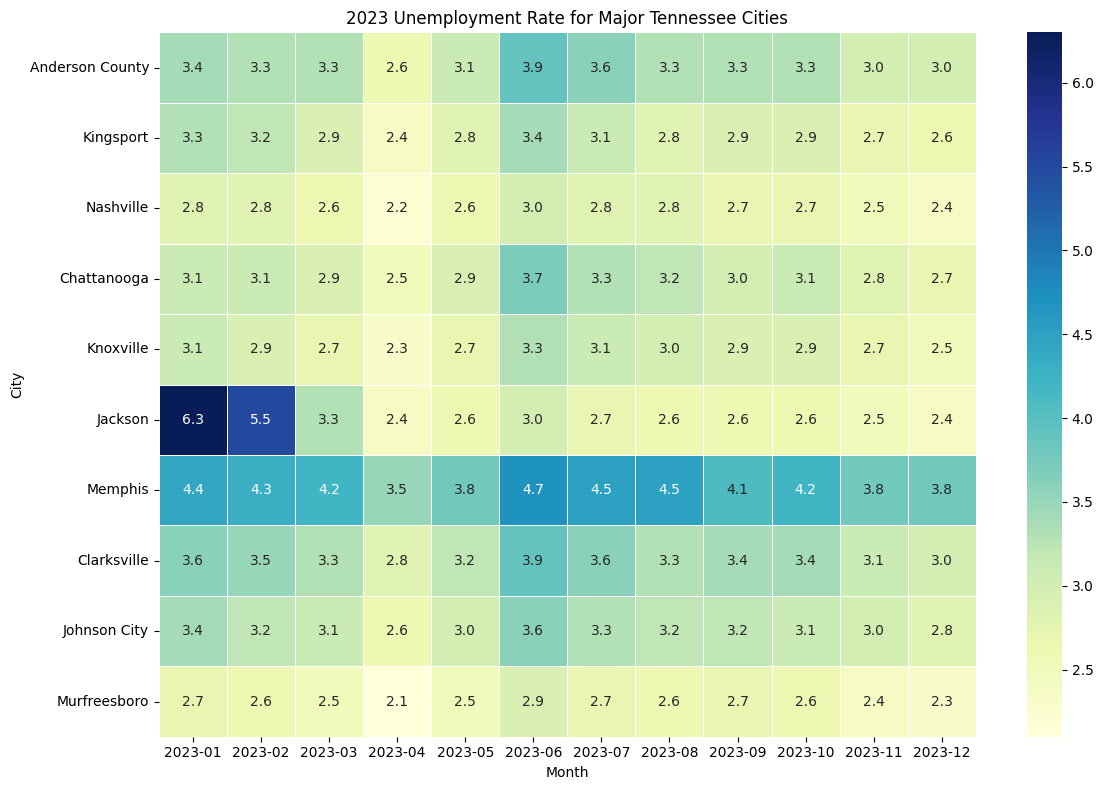

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extract the month
df_major_cities['Month'] = df_major_cities['Date'].dt.strftime('%Y-%m')

# Ensure 'Value' is numeric
df_major_cities['Value'] = pd.to_numeric(df_major_cities['Value'], errors='coerce')

# Pivot the DataFrame
heatmap_data = df_major_cities.pivot_table(index='seriesID', columns='Month', values='Value')

# Rename index
city_name_mapping = {
    'LAUCN470370000000003': 'Nashville',
    'LAUCN471570000000003': 'Memphis',
    'LAUCN470650000000003': 'Chattanooga',
    'LAUCN470930000000003': 'Knoxville',
    'LAUCN471630000000003': 'Clarksville',
    'LAUCN471870000000003': 'Murfreesboro',
    'LAUCN471790000000003': 'Johnson City',
    'LAUCN470090000000003': 'Kingsport',
    'LAUCN471550000000003': 'Jackson',
    'LAUCN470010000000003': 'Anderson County'
}
heatmap_data.rename(index=city_name_mapping, inplace=True)

# Sort columns
heatmap_data = heatmap_data.sort_index(axis=1)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('2023 Unemployment Rate for Major Tennessee Cities')
plt.ylabel('City')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

Fetching 2024 data for LAUCN470370000000003...
Fetching 2024 data for LAUCN471570000000003...
Fetching 2024 data for LAUCN470650000000003...
Fetching 2024 data for LAUCN470930000000003...
Fetching 2024 data for LAUCN471630000000003...
Fetching 2024 data for LAUCN471870000000003...
Fetching 2024 data for LAUCN471790000000003...
Fetching 2024 data for LAUCN470090000000003...
Fetching 2024 data for LAUCN471550000000003...
Fetching 2024 data for LAUCN470010000000003...


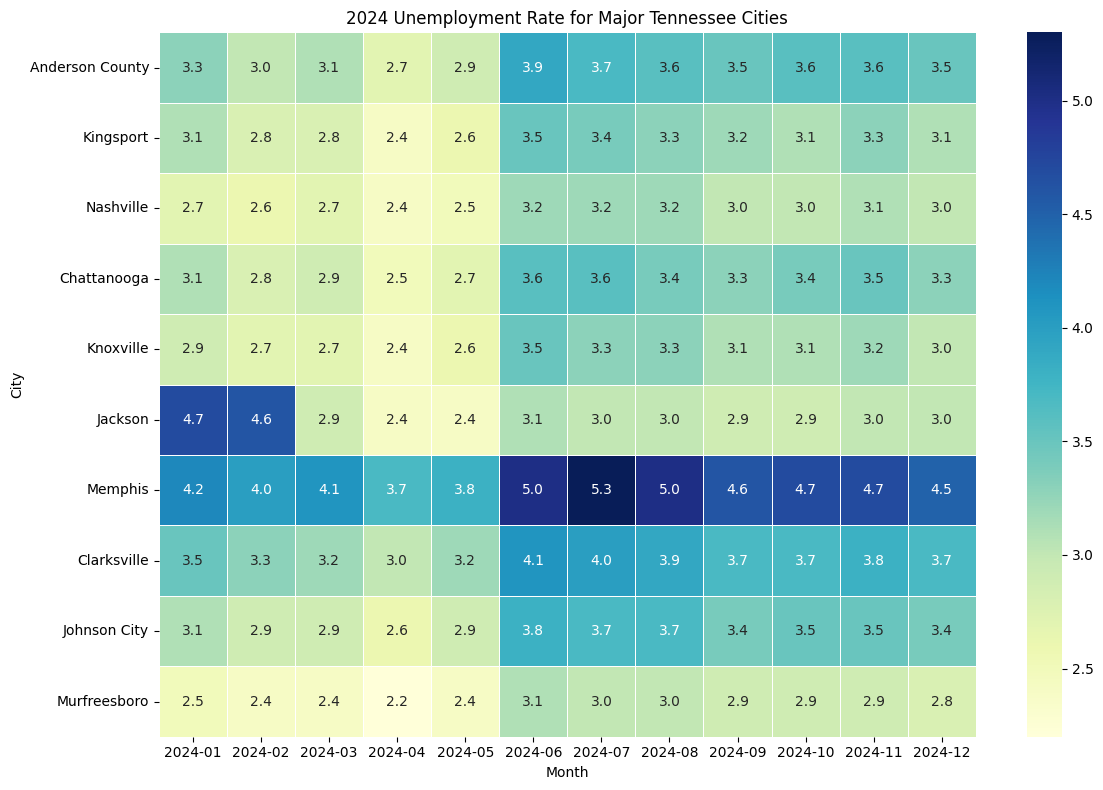

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Ensure your API key is here
YOUR_API_KEY = "YOUR_API_KEY"
major_city_unemployment_series_ids = [
    'LAUCN470370000000003', 'LAUCN471570000000003', 'LAUCN470650000000003',
    'LAUCN470930000000003', 'LAUCN471630000000003', 'LAUCN471870000000003',
    'LAUCN471790000000003', 'LAUCN470090000000003', 'LAUCN471550000000003',
    'LAUCN470010000000003'
]

all_city_data_2024 = []
headers = {'Content-type': 'application/json'}
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
throttle_delay = 1

for series_id in major_city_unemployment_series_ids:
    payload_data = {
        "seriesid": [series_id],
        "startyear": "2024",
        "endyear": "2024",
        "annualaverage": False,
        "registrationkey": YOUR_API_KEY
    }
    data = json.dumps(payload_data)
    print(f"Fetching 2024 data for {series_id}...")
    try:
        response = requests.post(url, data=data, headers=headers)
        response.raise_for_status()
        json_data = response.json()
        if json_data['status'] == 'REQUEST_SUCCEEDED' and 'Results' in json_data and 'series' in json_data['Results']:
            series_results = json_data['Results']['series'][0].get('data', [])
            for item in series_results:
                all_city_data_2024.append([series_id, pd.to_datetime(f"{item['year']}-{item['period'][1:]}-01", format='%Y-%m-%d'), item['value']])
        else:
            print(f"Error fetching 2024 data for {series_id}: {json_data.get('message')}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching 2024 data for {series_id}: {e}")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON for 2024 data for {series_id}: {e}")

    time.sleep(throttle_delay)

if all_city_data_2024:
    df_major_cities_2024 = pd.DataFrame(all_city_data_2024, columns=['seriesID', 'Date', 'Value'])

    # Extract the month
    df_major_cities_2024['Month'] = df_major_cities_2024['Date'].dt.strftime('%Y-%m')

    # Ensure 'Value' is numeric
    df_major_cities_2024['Value'] = pd.to_numeric(df_major_cities_2024['Value'], errors='coerce')

    # Pivot the DataFrame
    heatmap_data_2024 = df_major_cities_2024.pivot_table(index='seriesID', columns='Month', values='Value')

    # Rename index
    city_name_mapping = {
        'LAUCN470370000000003': 'Nashville',
        'LAUCN471570000000003': 'Memphis',
        'LAUCN470650000000003': 'Chattanooga',
        'LAUCN470930000000003': 'Knoxville',
        'LAUCN471630000000003': 'Clarksville',
        'LAUCN471870000000003': 'Murfreesboro',
        'LAUCN471790000000003': 'Johnson City',
        'LAUCN470090000000003': 'Kingsport',
        'LAUCN471550000000003': 'Jackson',
        'LAUCN470010000000003': 'Anderson County'
    }
    heatmap_data_2024.rename(index=city_name_mapping, inplace=True)

    # Sort columns
    heatmap_data_2024 = heatmap_data_2024.sort_index(axis=1)

    # Create the heatmap for 2024
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data_2024, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
    plt.title('2024 Unemployment Rate for Major Tennessee Cities')
    plt.ylabel('City')
    plt.xlabel('Month')
    plt.tight_layout()
    plt.show()

else:
    print("\nError fetching 2024 unemployment data for major Tennessee cities.")

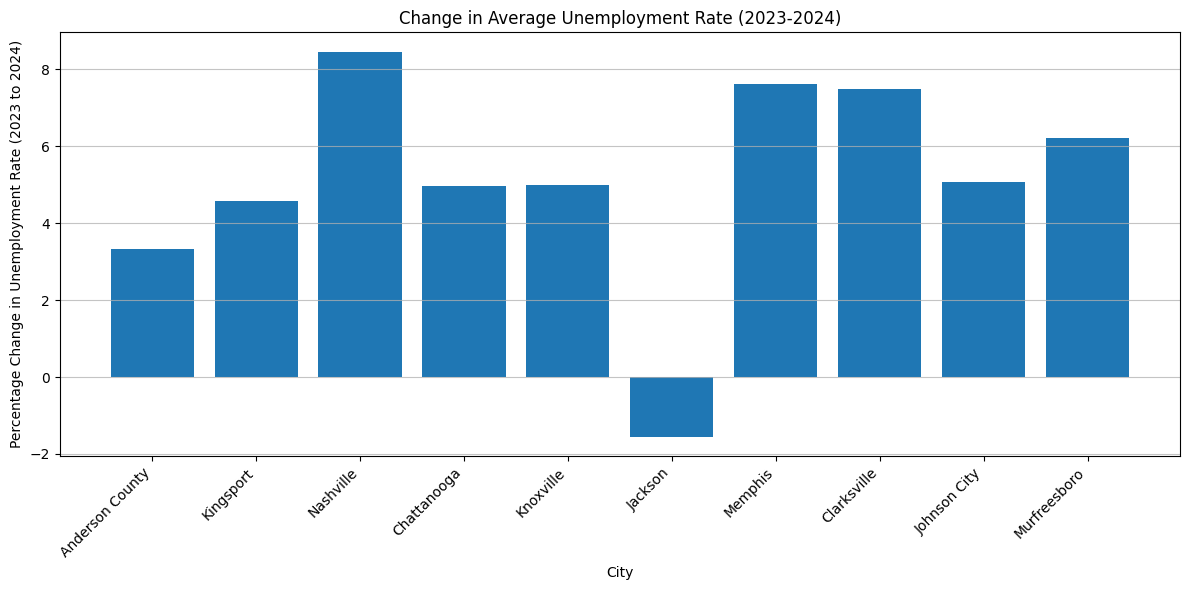

              City  Percentage_Change
2        Nashville           8.463950
6          Memphis           7.630522
7      Clarksville           7.481297
9     Murfreesboro           6.209150
8     Johnson City           5.066667
4        Knoxville           4.985337
3      Chattanooga           4.958678
1        Kingsport           4.571429
0  Anderson County           3.324808
5          Jackson          -1.558442


In [47]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate average unemployment rate for each city in 2023
avg_2023 = df_major_cities.groupby('seriesID')['Value'].mean().reset_index()
avg_2023 = avg_2023.rename(columns={'Value': 'Avg_2023'})

# Calculate average unemployment rate for each city in 2024
avg_2024 = df_major_cities_2024.groupby('seriesID')['Value'].mean().reset_index()
avg_2024 = avg_2024.rename(columns={'Value': 'Avg_2024'})

# Merge the average unemployment rates
comparison_df = pd.merge(avg_2023, avg_2024, on='seriesID')

# Calculate percentage change
comparison_df['Percentage_Change'] = ((comparison_df['Avg_2024'] - comparison_df['Avg_2023']) / comparison_df['Avg_2023']) * 100

# Rename cities for visualization
city_name_mapping = {
    'LAUCN470370000000003': 'Nashville',
    'LAUCN471570000000003': 'Memphis',
    'LAUCN470650000000003': 'Chattanooga',
    'LAUCN470930000000003': 'Knoxville',
    'LAUCN471630000000003': 'Clarksville',
    'LAUCN471870000000003': 'Murfreesboro',
    'LAUCN471790000000003': 'Johnson City',
    'LAUCN470090000000003': 'Kingsport',
    'LAUCN471550000000003': 'Jackson',
    'LAUCN470010000000003': 'Anderson County'
}
comparison_df['City'] = comparison_df['seriesID'].map(city_name_mapping)

# Visualize the percentage change
plt.figure(figsize=(12, 6))
plt.bar(comparison_df['City'], comparison_df['Percentage_Change'])
plt.xlabel('City')
plt.ylabel('Percentage Change in Unemployment Rate (2023 to 2024)')
plt.title('Change in Average Unemployment Rate (2023-2024)')
plt.xticks(rotation=45, ha='right')  # Rotate city names for better readability
plt.tight_layout()
plt.grid(axis='y', alpha=0.75)
plt.show()

print(comparison_df[['City', 'Percentage_Change']].sort_values(by='Percentage_Change', ascending=False))